In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as mpimg

from skimage.morphology import watershed
from skimage.feature import peak_local_max
import skimage.morphology as morph
from scipy import ndimage

from skimage.feature import canny
from scipy import ndimage as ndi

from skimage.filters import sobel
from skimage.segmentation import watershed
import skimage.measure
import skimage.morphology

from google.colab import files
uploaded = files.upload()

def vdk_perimeter(convert_matrix_copy1):
    (w, h) = convert_matrix_copy1.shape
    data = np.zeros((w + 2, h + 2), dtype=convert_matrix_copy1.dtype)
    data[1:-1, 1:-1] = convert_matrix_copy1
    data = skimage.morphology.binary_dilation(data)
    newdata = np.copy(data)
    for i in range(1, w + 1):
        for j in range(1, h + 1):
            cond = data[i, j] == data[i, j + 1] and \
                   data[i, j] == data[i, j - 1] and \
                   data[i, j] == data[i + 1, j] and \
                   data[i, j] == data[i - 1, j]
            if cond:
                newdata[i, j] = 0

    return np.count_nonzero(newdata)

image1 = cv2.imread('2.png')
image = cv2.imread('2.png',0)




Saving 2.png to 2 (1).png


In [2]:
image_equalized = cv2.equalizeHist(image)
markers = np.zeros_like(image_equalized)
markers[image_equalized < 20] = 1
markers[image_equalized > 250] = 2

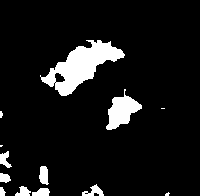

In [3]:
from PIL import Image
cm = Image.fromarray(markers * 255)
cm = cm.convert('RGB')
cm

In [4]:
elevation_map = sobel(image_equalized)


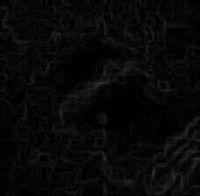

In [5]:
from PIL import Image
cm = Image.fromarray(elevation_map * 255)
cm = cm.convert('RGB')
cm

In [6]:
markers = np.zeros_like(image_equalized)
markers[image_equalized < 20] = 1
markers[image_equalized > 250] = 2
segmentation = watershed(elevation_map, markers)




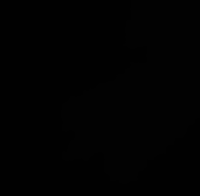

In [7]:
from PIL import Image
cm = Image.fromarray(segmentation)
cm = cm.convert('RGB')
cm

In [8]:
segmentation = ndi.binary_fill_holes(segmentation - 1)

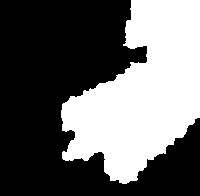

In [9]:
from PIL import Image
cm = Image.fromarray(segmentation)
cm = cm.convert('RGB')
cm

In [10]:
label_img = skimage.measure.label(segmentation)
regions = skimage.measure.regionprops(label_img)

for props in regions:
    print (props.area, vdk_perimeter(props.convex_image))

15587 487


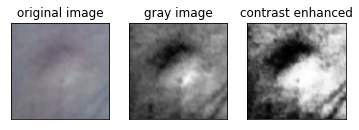

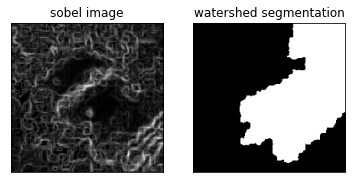

In [11]:
plt.subplot(131),plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.title('original image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(image, cmap='gray')
plt.title('gray image'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(image_equalized, cmap = 'gray')
plt.title('contrast enhanced'), plt.xticks([]), plt.yticks([])
plt.show()
plt.subplot(122),plt.imshow(segmentation, cmap = 'gray')
plt.title('watershed segmentation'), plt.xticks([]), plt.yticks([])
plt.subplot(121),plt.imshow(elevation_map, cmap = 'gray')
plt.title('sobel image'), plt.xticks([]), plt.yticks([])
plt.show()